In [1]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [4]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [21]:
params = MaaSSim.utils.get_config('glance.json')
params.city = "Delft, Netherlands"
params.paths.G = "../../data/graphs/Delft.graphml"
params.paths.skim = "../../data/graphs/Delft.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 3000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False #True
params.proportional_std = 0.1 # proportional standard deviation [0.1, 0.2, 0.3] for both VoT & RW distributions
params.d2d.ini_att = 0.01
params.d2d.B_income = 1

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in Oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 3

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro 
params.platforms.fare = float(1.2)# float(1.20) #euro/km #http://taxihowmuch.com/
params.platforms.min_fare = float(4) # euro #http://taxihowmuch.com/
params.d2d.fuel_cost = 0.25 #euro/km #https://help.ubercarshare.com/hc/en-gb/articles/360022882131-Choosing-your-car-s-distance-rate  
params.platforms.comm_rate = float(0.25) # float(0.20) for baseline
params.platforms.discount = float(0.0) 
params.platforms.incentive = float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 
params.d2d.B_Experience = 0.70
params.d2d.B_WOM = 0.20
params.d2d.B_Marketing = 0.10
params.d2d.diffusion_speed = 10/100 
params.d2d.m = 5 #7
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.f_stop_crit = False
params.assert_me = False
# params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 1000
params.nV = 50
params.nD = 100
params.simTime = 4 
params.d2d.res_wage = params.simTime*11.16 

In [22]:
# sim = MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)
sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out, f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

24-05-24 12:11:35-WARNING-Setting up 4h simulation at 2024-05-24 10:11:32 for 100 vehicles and 1000 passengers in Delft, Netherlands
Day =  0
24-05-24 12:11:38-WARNING-simulation time 1.2 s
nP =  0    nV =  0
Day =  1
24-05-24 12:11:41-WARNING-simulation time 1.4 s
nP =  9    nV =  1
Day =  2
24-05-24 12:11:45-WARNING-simulation time 1.5 s
nP =  18    nV =  1
Day =  3
24-05-24 12:11:49-WARNING-simulation time 1.4 s
nP =  30    nV =  0
Day =  4
24-05-24 12:11:53-WARNING-simulation time 1.7 s
nP =  41    nV =  1
Day =  5
24-05-24 12:11:57-WARNING-simulation time 2.0 s
nP =  54    nV =  1
Day =  6
24-05-24 12:12:01-WARNING-simulation time 2.1 s
nP =  50    nV =  4
Day =  7
24-05-24 12:12:06-WARNING-simulation time 2.3 s
nP =  55    nV =  6
Day =  8
24-05-24 12:12:11-WARNING-simulation time 2.3 s
nP =  55    nV =  5
Day =  9
24-05-24 12:12:15-WARNING-simulation time 2.5 s
nP =  65    nV =  6
Day =  10
24-05-24 12:12:21-WARNING-simulation time 2.9 s
nP =  90    nV =  6
Day =  11
24-05-24 12

In [23]:
df = sim.res[99].pax_exp
df

,rh_U,alt_U,ACTUAL_WT,U_dif,OUT,mu,nDAYS_HAILED,EXPERIENCE_U,MARKETING_U,WOM_U,...,ACCEPTS_OFFER,REJECTS_OFFER,ARRIVES_AT_PICKUP,MEETS_DRIVER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,SETS_OFF_FOR_DEST,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
pax,,,,,,,,,,,,,,,,,,,,,
0,-6.170606,-5.500244,0.00,0.000000,True,0,8.0,0.01,0.298730,0.017953,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,-6.373311,-5.690363,0.00,0.000000,True,0,8.0,0.01,0.462053,0.016262,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,-6.324111,-5.642833,0.00,0.000000,True,0,9.0,0.01,0.595287,0.016237,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,-7.019275,-6.300133,0.00,0.000000,True,0,11.0,0.01,0.298730,0.015121,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,-5.834700,-5.181448,0.00,0.000000,True,0,16.0,0.01,0.750751,0.017072,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-5.717747,-5.071319,0.00,0.000000,True,0,7.0,0.01,0.595287,0.016089,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
996,-7.190600,-5.977859,1.45,0.202872,False,1,10.0,0.01,0.794436,0.020523,...,15.0,0,20.0,87.0,30.0,429.0,10.0,0,0,0
997,-7.854744,-7.087270,0.00,0.000000,True,0,9.0,0.01,0.595287,0.018609,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [24]:
df = sim.res[499].pax_exp

df[df.rh_U>df.alt_U]

,rh_U,alt_U,ACTUAL_WT,U_dif,OUT,mu,nDAYS_HAILED,EXPERIENCE_U,MARKETING_U,WOM_U,...,ACCEPTS_OFFER,REJECTS_OFFER,ARRIVES_AT_PICKUP,MEETS_DRIVER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,SETS_OFF_FOR_DEST,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
pax,,,,,,,,,,,,,,,,,,,,,


In [7]:
def smooth(y,w=41,o=1,d=5):
    from scipy.signal import savgol_filter
    nans = [float('nan') for i in range(0,d)] 
    y = nans + list(savgol_filter(y[d:],w,o))
    for i in range(0,len(y)):
        if y[i]<0:
            y[i] = 0
    return y

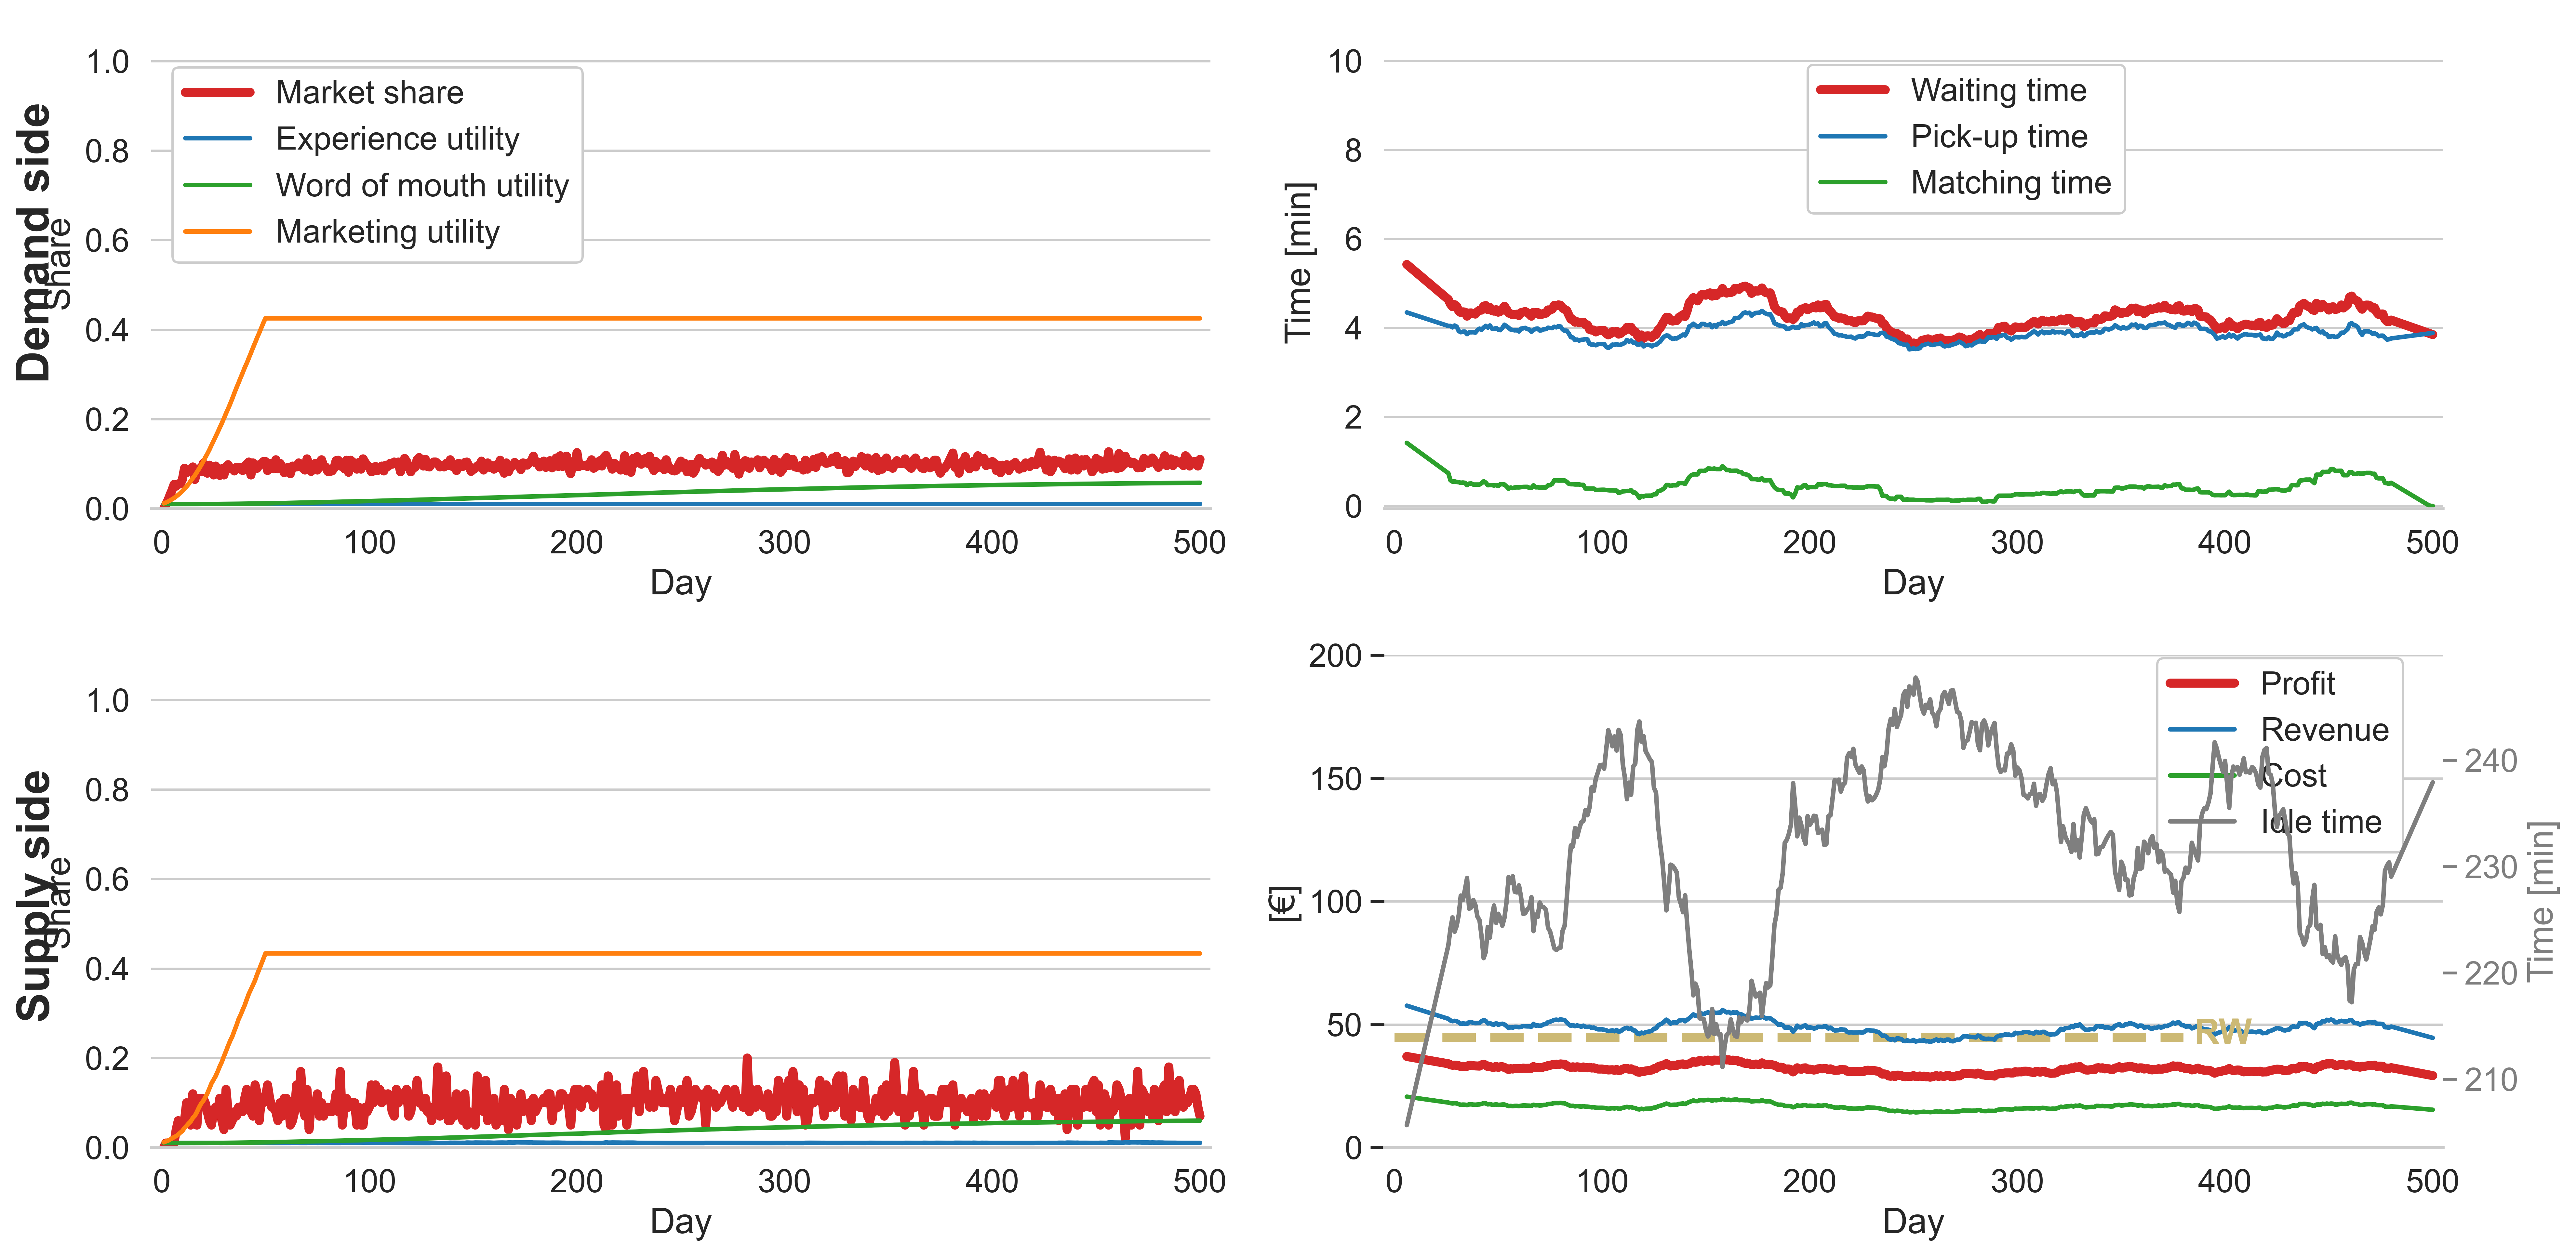

In [25]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.3)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)
d1 = pd.DataFrame()


for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
        d1['P_WOM_U'] = yw; d1['P_MARKETING_U'] = ym
        d1['P_EXPERIENCE_U'] = ye; d1['P_SHARE'] = yms
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
        d1['V_WOM_U'] = yw; d1['V_MARKETING_U'] = ym
        d1['V_EXPERIENCE_U'] = ye; d1['V_SHARE'] = yms
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n][0])
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n][0])
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n][0])
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n][0])
   
    # ax[ax_n][0].vlines([100], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n][0].grid(axis='x')
    ax[ax_n][0].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,sim.params.nD+5))
    
# ax[0][0].set_title('Demand side',fontweight='bold', loc='center',fontsize=20);ax[0][1].set_title('Supply side',fontweight='bold', loc='center',fontsize=20)
ax[0][0].legend(frameon=True,framealpha=1, loc=(0.02,0.5))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1][0].get_legend().set_visible(False)

#===============================================================================================

x = []; yw = []; yp = []; yi = []; ym = []; yr = []; yprof = []; yc = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    yw.append(df[df.OUT==False].ACTUAL_WT.mean()) # Waiting time per passenger
    ym.append(df[df.OUT==False].MATCHING_T.mean()) # Matching time per passenger
    # yprof.append(df.plat_profit.sum())
    
    df = sim.res[d].veh_exp
    yp.append(df[df.OUT==False].ARRIVES_AT_PICKUP.mean()/(df[df.OUT==False].nRIDES.mean()*60))
    yi.append(df[df.OUT==False].IDLE_TIME.mean()/60)
    yr.append(df[df.OUT==False].REVENUE.mean())
    yprof.append(df[df.OUT==False].ACTUAL_INC.mean())
    yc.append(df[df.OUT==False].COST.mean())

yw = smooth(yw); ym = smooth(ym); yp = smooth(yp); yi = smooth(yi)
yr = smooth(yr); yprof = smooth(yprof); yc = smooth(yc)

d2 = pd.DataFrame()
d2['yw'] = yw; d2['ym'] = ym; d2['yp'] = yp; d2['yi'] = yi
d2['yr'] = yr; d2['yprof'] = yprof; d2['yc'] = yc

x = [i for i in range(1,len(yp)+1)]
sns.lineplot(x=x, y=yw, label = 'Waiting time', color='C3',lw=4, ax=ax[0][1])#, marker='o')
sns.lineplot(x=x, y=yp, label = 'Pick-up time', color='C0',lw=2, ax=ax[0][1])#, marker='o')
sns.lineplot(x=x, y=ym, label = 'Matching time', color='C2',lw=2, ax=ax[0][1])#, marker='o')
sns.lineplot(x=x, y=yprof, label = 'Profit', color='C3',lw=4, ax=ax[1][1])#, marker='o')
sns.lineplot(x=x, y=yr, label = 'Revenue', color='C0',lw=2, ax=ax[1][1])#, marker='o')
sns.lineplot(x=x, y=yc, label = 'Cost', color='C2',lw=2, ax=ax[1][1])#, marker='o')ax.twinx()
ax11 = ax[1][1].twinx()
sns.lineplot(x=x, y=yi, label = 'Idle time', color='C7',lw=2, ax=ax11)#, marker='o')
ax11.set(ylabel='Time [min]')
ax11.grid(b=None)

lines, labels = ax[1][1].get_legend_handles_labels()
lines2, labels2 = ax11.get_legend_handles_labels()
ax[1][1].legend(lines + lines2, labels + labels2,framealpha=1, loc=(0.73,0.6))
ax11.legend().remove()
# ax11.spines['right'].set_color('C7')
ax11.tick_params(axis='y', colors='C7')
ax11.yaxis.label.set_color('C7')

for i in [0,1]:
    ax[i][1].grid(axis='x')

# ax[0][1].vlines([100], 0, 11, linestyles='dashed', colors='black')
# ax[1][1].vlines([100], 0, 110, linestyles='dashed', colors='black')
ax[1][1].hlines([params.d2d.res_wage], 0, 380, linestyles='dashed', colors='y', lw=4)
ax[1][1].annotate('RW', xy =(385,42), fontweight='bold', color='y')
  
    
ax[0][1].set(xlabel='Day', ylabel='Time [min]', ylim=(-0.06,11), xlim=(-5,sim.params.nD+5)); ax[1][1].set(xlabel='Day', ylabel='[€]', ylim=(0,200),xlim=(-5,sim.params.nD+5))
ax[0][1].legend(loc=(0.4,0.6),framealpha=1)

ax[0][0].text(x=-70 ,y=0.3, s='Demand side',fontweight='bold',fontsize=20, rotation=90)
ax[1][0].text(x=-70 ,y=0.3, s='Supply side',fontweight='bold',fontsize=20, rotation=90)
sns.despine(left=True)


plt.tight_layout()
# plt.savefig('Fig1x.png')

In [ ]:
============================================

In [12]:
sim.inData.skim

[autoreload of MaaSSim.utils failed: Traceback (most recent call last):
  File "C:\Users\farno\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\farno\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\farno\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\farno\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "C:\Users\farno\OneDrive\Documents\GitHub\MaaSSim\MaaS

,6316199,46379627,46380013,46380094,46372441,46389218,46380483,46372472,46388842,46380482,...,4377757606,5571870213,5631071987,6276171190,6276171199,6927478755,6927478758,7894261942,9102494879,9579558813
6316199,0,42,86,123,206,225,233,244,267,273,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
25596477,3188,3145,3189,3227,3309,2881,3337,3306,2923,3376,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
25658579,4145,4186,4118,4155,3989,3921,4253,3988,3963,4293,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
26203121,2378,2420,2312,2349,2183,2407,2166,2221,2365,2206,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
26206556,2057,2100,1992,2029,1863,2211,1846,1901,2169,1886,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665415492,5770,5812,5742,5780,5614,5995,5811,5613,6022,5851,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
9665415493,5682,5724,5655,5692,5526,5907,5724,5525,5935,5763,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
9665415494,5669,5711,5641,5679,5513,5894,5710,5512,5921,5750,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
9665464014,6026,5983,5926,5888,6047,5803,5795,6084,5761,5755,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [14]:
pd.Timedelta(3600, 's').floor('s')

Timedelta('0 days 01:00:00')

In [22]:
sim.inData.skim

,6316199,46379627,46380013,46380094,46372441,46389218,46380483,46372472,46388842,46380482,...,4377757606,5571870213,5631071987,6276171190,6276171199,6927478755,6927478758,7894261942,9102494879,9579558813
6316199,0,42,86,123,206,225,233,244,267,273,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
25596477,3188,3145,3189,3227,3309,2881,3337,3306,2923,3376,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
25658579,4145,4186,4118,4155,3989,3921,4253,3988,3963,4293,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
26203121,2378,2420,2312,2349,2183,2407,2166,2221,2365,2206,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
26206556,2057,2100,1992,2029,1863,2211,1846,1901,2169,1886,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9665415492,5770,5812,5742,5780,5614,5995,5811,5613,6022,5851,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
9665415493,5682,5724,5655,5692,5526,5907,5724,5525,5935,5763,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
9665415494,5669,5711,5641,5679,5513,5894,5710,5512,5921,5750,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
9665464014,6026,5983,5926,5888,6047,5803,5795,6084,5761,5755,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [7]:
sim.inData.G.nodes[1269112834]

NameError: name 'sim' is not defined

In [9]:
g = ox.load_graphml(filepath='Delft.graphml')


In [13]:
g.nodes[1402613311]

{'y': 52.02756, 'x': 4.3624286, 'osmid': 1402613311}

In [14]:
params.speeds.ride

10